## Projections

At the start of the chapter, we considered the projection of one vector onto the direction of another, and how to use that projection to decompose the vector into two orthogonal components.  We then considered the higher dimensional analogy of projecting a vector onto a subspace and, using that projection to decompose the vector into orthogonal components.   In this section, we concentrate on these concepts, and consider projections as linear transformations which have applications beyond vector decomposition.

A linear transformation $T:\mathbb{R}^n \to \mathbb{R}^n$ is a **projection** if $T\circ T = T$.  The result of applying a projection once is the same as the result of applying it twice.  We can understand the effect of a projection as the collapsing of a vector in $\mathbb{R}^n$ onto a subspace $\mathcal{V}$.  Once a vector has been projected onto $\mathcal{V}$, any further projection onto $\mathcal{V}$ has no effect.      


### Example 1:  Orthogonal projection in $\mathbb{R}^2$

We look first at a projection onto the $x_1$-axis in $\mathbb{R}^2$.  This transformation $T:\mathbb{R}^2\to\mathbb{R}^2$ can be defined with the following formula.

$$
\begin{equation}
T\left( \left[ \begin{array}{r} x \\ y \end{array} \right]\right) =
\left[ \begin{array}{r} x \\ 0 \end{array} \right]
\end{equation}
$$

This projection simply carries all vectors onto the $x_1$-axis based on their first entry.

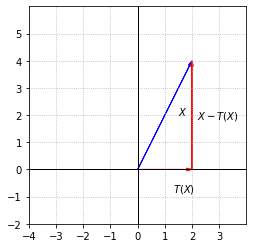

In [1]:
%matplotlib inline
import numpy as np
import laguide as lag
import matplotlib.pyplot as plt

x=np.linspace(-6,6,100)

fig, ax = plt.subplots()

options = {"head_width":0.1, "head_length":0.2, "length_includes_head":True}

ax.arrow(0,0,2,4,fc='b',ec='b',**options)
ax.arrow(0,0,2,0,fc='r',ec='r',**options)
ax.arrow(2,0,0,4,fc='r',ec='r',**options)

ax.set_xlim(-4,4)
ax.set_ylim(-2,6)
ax.set_aspect('equal')
ax.set_xticks(np.arange(-4,4,step = 1))
ax.set_yticks(np.arange(-2,6,step = 1))

ax.text(1.5,2,'$X$')
ax.text(1.3,-0.8,'$T(X)$')
ax.text(2.2,1.85,'$X - T(X)$')

ax.axvline(color='k',linewidth = 1)
ax.axhline(color='k',linewidth = 1)

ax.grid(True,ls=':')

Notice that if we decompose $X$ into the components $T(X)$ and $X - T(X)$, then $T(X)$ and $X - T(X)$ are orthogonal.

### Example 2  Nonorthogonal projection in $\mathbb{R}^2$

Now let's consider $T:\mathbb{R}^2 \to \mathbb{R}^2$ defined by $T(X) = PX$ where $P$ is the following matrix.

$$
\begin{equation}
\left[\begin{array}{rr} 3/2 & -3/2 \\ 1/2 & -1/2 \end{array}\right]
\end{equation}
$$

To verify that $T$ is indeed a projection, we need to check that $P^2X = PX$ for every $X$ in $\mathbb{R}^2$.  This will be true if $P^2=P$.

In [7]:
P = np.array([[1.5, -1.5],[0.5, -0.5]])
print(P@P)

[[ 1.5 -1.5]
 [ 0.5 -0.5]]


Now that we know $T$ is a projection, let's consider the effect of $T$ a bit more carefully.  We observe that the second column is a multiple of the first.  This means that $\mathcal{C}(P)$ is one-dimensional.  Since $P^2=P$, we 
know that any vector $X$ in the column space will be unchanged when multiplied by $P$.


$$
\begin{equation}
PX = \left[\begin{array}{rr} 3/2 & -3/2 \\ 1/2 & -1/2 \end{array}\right]
\left[\begin{array}{r} 3k \\ k \end{array}\right] =
\left[\begin{array}{r} 3k \\ k \end{array}\right] = X
\end{equation}
$$

Next, let's observe the effect of $T$ on a vector $X$ that is not in $\mathcal{C}(P)$

$$
\begin{equation}
PX = \left[\begin{array}{rr} 3/2 & -3/2 \\ 1/2 & -1/2 \end{array}\right]
\left[\begin{array}{r} 2 \\ 4 \end{array}\right] =
\left[\begin{array}{r} -3 \\ -1 \end{array}\right] 
\end{equation}
$$

In [10]:
X = np.array([[2],[4]])
print(P@X)

[[-3.]
 [-1.]]


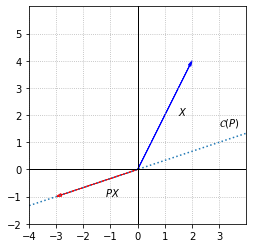

In [4]:
fig, ax = plt.subplots()

ax.arrow(0,0,2,4,fc='b',ec='b',**options)
ax.arrow(0,0,-3,-1,fc='r',ec='r',**options)
ax.plot(x,x/3,ls=':')

ax.set_xlim(-4,4)
ax.set_ylim(-2,6)
ax.set_aspect('equal')
ax.set_xticks(np.arange(-4,4,step = 1))
ax.set_yticks(np.arange(-2,6,step = 1))

ax.text(1.5,2,'$X$')
ax.text(-1.2,-1,'$PX$')
ax.text(3,1.6,'$\mathcal{C}(P)$')

ax.axvline(color='k',linewidth = 1)
ax.axhline(color='k',linewidth = 1)

ax.grid(True,ls=':')

We see of course that $PX$ is in $\mathcal{C}(P)$, but in contrast to the projection in the previous example, this projections is not orthogonal.  If we decompose $X$ into components $PX$ and $X-PX$, we see that these components are not orthogonal.

In [8]:
V = P@X
E = X-V
print(lag.DotProduct(V,E))

-8.0


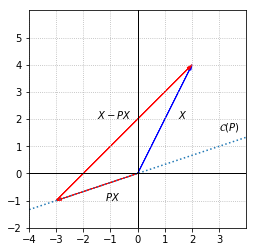

In [9]:
fig, ax = plt.subplots()

ax.arrow(0,0,2,4,fc='b',ec='b',**options)
ax.arrow(-3,-1,5,5,fc='r',ec='r',**options)
ax.arrow(0,0,-3,-1,fc='r',ec='r',**options)
ax.plot(x,x/3,ls=':')

ax.set_xlim(-4,4)
ax.set_ylim(-2,6)
ax.set_aspect('equal')
ax.set_xticks(np.arange(-4,4,step = 1))
ax.set_yticks(np.arange(-2,6,step = 1))

ax.text(1.5,2,'$X$')
ax.text(-1.2,-1,'$PX$')
ax.text(-1.5,2,'$X-PX$')
ax.text(3,1.6,'$\mathcal{C}(P)$')

ax.axvline(color='k',linewidth = 1)
ax.axhline(color='k',linewidth = 1)

ax.grid(True,ls=':')

The transformation is projecting onto $\mathcal{C}(P)$, but *not in the orthogonal direction*.  To reveal the direction of the projection, we look at $\mathcal{N}(P)$.  

$$
\begin{equation}
\mathcal{N}(P) = \textrm{Span of} \left\{ \left[ \begin{array}{r} 1 \\ 1 \end{array} \right]\right\}
\end{equation}
$$

Any vector in $\mathcal{N}(P)$ is projected to the zero vector.  The key point is that $PX-X$ must be in $\mathcal{N}(P)$ precisely because $P$ represents a projection and $P^2=P$.

$$
\begin{equation}
P(PX-X) = P^2X - PX = PX - PX = 0  
\end{equation}
$$

In general, projections take all vectors onto one subspace, in the direction of another subspace.

### Orthogonal projections

Having observed that projections can be carried out in an arbitrary direction, we now focus attention on how to define a matrix $P$ that carries out an **orthogonal projection** onto a subspace $\mathcal{V}$ of $\mathbb{R}^n$.  That is, for a vector $B$ in $\mathbb{R}^n$, we want the projection matrix $P$ such that $\hat{B} = PB$ is in $\mathcal{V}$ and $E = B-\hat{B}$ to be orthogonal to $\mathcal{V}$.  In fact, we have already seen the necessary calculations for these projections.

In the simplest example, $\mathcal{V}$ is one-dimensional with basis $\{V\}$, with $V$ a vector of unit length.  In our discussion of [orthogonalization](Orthogonalization.ipynb) we worked out the following formula.

$$ 
\begin{equation}
\hat{B} = \left(\frac{B\cdot V}{V\cdot V}\right){V}
\end{equation}
$$

Since $V$ is a unit vector, we can use $V\cdot V=1$.  We can also manipulate this order of the factors since $B\cdot V = V\cdot B$, and the order that we multiply the scalar and vector does not affect the result. 

$$ 
\begin{equation}
\hat{B} = V \left(V\cdot B \right) 
\end{equation}
$$

In order to understand this as a matrix-vector multiplication, we can rewrite it using matrix multiplication for the dot products, and the associative property of matrix multiplication.

$$ 
\begin{equation}
\hat{B} = V \left(V^TB \right) = (VV^T)B 
\end{equation}
$$

The result is that if $V$ is a unit vector, the matrix $P = VV^T$ orthogonally projects $B$ onto $\mathcal{V}$.

In the most general case, $\mathcal{V}$ is a $m$-dimensional subspace of $\mathbb{R}^n$ with basis $\{V_1, V_2,..., V_m\}$.  This scenario was treated in the previous section on least squares solutions.  If $A$ is a matrix with the $V_i$ as columns, and $B$ is a vector that is not in $\mathcal{C}(A)$, we found that we can solve the normal equations $A^TAX=A^TB$ in order to find a vector $\hat{X}$ such that $A\hat{X} = \hat{B}$ and $\hat{B}$ is the orthogonal projection of $B$ onto $\mathcal{C}(A)$.  If we now want to focus on the projection of $B$, we can write $\hat{B} = PB$ where $P = A(A^TA)^{-1}A^T$ is the projection matrix.

In the case that we have an orthonormal basis, projection onto a subspace is quite a bit simpler.  If $\{U_1, U_2,..., U_m\}$ is an orthonormal basis for an $m$-dimensional subspace $\mathcal{V}$, $\hat{B}$ can be written in expressed in terms of the basis vectors, with coordinates computed using dot products.

$$
\begin{equation}
\hat{B} = (B\cdot U_1)U_1 + (B\cdot U_2)U_2 + ... + (B\cdot U_m)U_m
\end{equation}
$$

As we did in the 1-dimensional case, we can use the properties of dot products and matrix multiplications to rewrite this as $\hat{B} = PB$ for some projection matrix $P$.

$$
\begin{eqnarray*}
\hat{B} & = & U_1(U_1\cdot B) + U_2(U_2\cdot B) + ... + U_m(U_m\cdot B) \\
& = & U_1(U_1^TB) + U_2(U_2^TB) + ... + U_m(U_m^TB) \\
& = & (U_1U_1^T)B + (U_2U_2^T)B + ... + (U_mU_m^T)B \\
& = & (U_1U_1^T + U_2U_2^T + ... + U_mU_m^T)B 
\end{eqnarray*}
$$

Each of the matrices $U_i^TU_i$ projects $B$ onto the direction of $U_i$.  The sum of all of the individual projections gives us $\hat{B}$, and the sum of all the projection matrices gives us $P = U_1U_1^T + U_2U_2^T + ... + U_mU_m^T$. 

We can also realize that the formula $P = A(A^TA)^{-1}A^T$ for the general case still applies.  Let's take $Q$ to be the matrix with $U_i$ as columns.  Since $Q$ is an orthogonal matrix, $Q^TQ= I$, and $P =  Q(Q^TQ)^{-1}Q^T = QQ^T$.  

### Exercises

**Exercise 1:** Let $\mathcal{U}$ be the subspace of $\mathbb{R}^3$ spanned by $\{X_1,X_2\}$ where $X_1$ and $X_2$ are given below. Find a matrix $P$ such that $PX = B$ where $B$ is the orthogonal projection of $X$ onto $\mathcal{U}$. Verify your answer.


$$
\begin{equation}
X_1 = \left[\begin{array}{r} 1 \\ 1 \\ 2 \end{array}\right]  \hspace{1cm}
X_2 = \left[\begin{array}{r} 2 \\ 0 \\ -1 \end{array}\right]
\end{equation}
$$



In [11]:
## Code solution here

**Exercise 2:** Let $\mathcal{W}$ be a subspace of $\mathbb{R}^4$ with $\dim{\mathcal{W}}=2$. What will be the dimensions of a matrix $P$ that projects vectors orthogonally onto $\mathcal{W}$?  Will the dimensions of $P$ change if $\dim{\mathcal{W}}=3$?

In [13]:
## Code solution here 

**Exercise 3:** 

$(a)$ Let $\mathcal{U} = \{[x_1\, x_2\, x_3, x_4]^T : x_1 + 3x_2 + x_3 -2x_4 = 0 \}$. Find the matrix $P$ that projects vectors orthogonally onto $\mathcal{U}$.

$(b)$ Demonstrate that your matrix is a projection matrix by showing that $P^2 = P$.

In [ ]:
## Code solution here.

**Exercise 4:** 

($a$) Let $\mathcal{V} = \{[x_1\, x_2\, x_3]^T : x_1 + x_2 + x_3  = 0 \}$.  Find the matrix $P$ that projects vectors orthogonally onto $\mathcal{V}$ by two different methods. 

$(b)$ Demonstrate that your matrix is a projection matrix by showing that $P^2 = P$.

In [12]:
## Code solution here

**Exercise 5:** 

$(a)$ Find the matrix $P_1$ that projects orthogonally onto the subspace spanned by $\begin{equation}
\left\{ \left[ \begin{array}{r} 2 \\ 1 \end{array} \right]\right\}
\end{equation}$.

$(b)$ Find the matrix $P_2$ that projects orthogonally onto the subspace spanned by $\begin{equation}
\left\{ \left[ \begin{array}{r} -1 \\ 4 \end{array} \right]\right\}
\end{equation}$.

$(c)$ Is the product $P_1P_2$ also an orthogonal projection?

In [ ]:
## Code solution here.

**Exercise 6:** Let $\mathcal{U}$ be the subspace spanned by $\begin{equation} \left\{ \left[ \begin{array}{r} 0 \\ 1 \\ 0 \end{array} \right]\right\} \end{equation}$ and $\mathcal{W}$ be the subspace spanned by $\begin{equation} \left\{ \left[ \begin{array}{r} 2 \\ 1 \\ 1 \end{array} \right] \hspace{0.1cm} , \hspace{0.1cm} \left[ \begin{array}{r} 0 \\ 1 \\ 1 \end{array} \right]\right\} \end{equation}$

$(a)$ Find a matrix $P$ so that $PX$ is the projection of $X$ onto $\mathcal{U}$ along $\mathcal{W}$.

$(b)$ Check that $P^2 = P$

$(c)$ Check that $PX$ is in $\mathcal{U}$ for any $X \in \mathbb{R}^3$.

$(d)$ Check that $PW = 0$ for any $W \in \mathcal{W}$.

In [ ]:
## Code solution here.